### 1. IMPORT ALL NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline 

### 2. READ/IMPORT THE SONAR DATASET

In [2]:
loan = pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\Dataset\ML Projects\loan-train.csv')

### 3. DESCRIPTIVE ANALYSIS: AN INSIGHT INTO THE DATASET
##### A. DISPLAY THE FIRST 5 ROWS

In [3]:
loan[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### B. GET THE SHAPE OF THE DATASET

In [4]:
loan.shape

(614, 13)

##### C. GET A STATISTICAL OVERVIEW OF THE DATA

In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### D. CHECK AND HANDLE MISSING VALUES

In [6]:
missingValues = loan.isnull().sum().sort_values(ascending=False)
percent = (loan.isnull().sum() / loan.isnull().count()).sort_values(ascending=False)
percent = round((percent*100), 2)
missing = pd.concat([missingValues, percent], axis = 1, keys = ['TotalMissing', 'PercentMissing'])
missing

,TotalMissing,PercentMissing
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49
Loan_ID,0,0.00
Education,0,0.00
ApplicantIncome,0,0.00


In [7]:
loan['LoanAmount'] = round(loan['LoanAmount'].replace(np.NaN, loan['LoanAmount'].mean()), 0)                                             
loan['Credit_History'] = loan['Credit_History'].replace(np.NaN, loan['Credit_History'].median())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].replace(np.NaN, statistics.mode(loan['Loan_Amount_Term']))
loan['Gender'] = loan['Gender'].replace(np.NaN, statistics.mode(loan['Gender']))
loan['Dependents'] = loan['Dependents'].replace(np.NaN, statistics.mode(loan['Dependents']))
loan['Self_Employed'] = loan['Self_Employed'].fillna(method ='ffill')
loan['Married'] = loan['Married'].fillna(method ='bfill')

<AxesSubplot:>

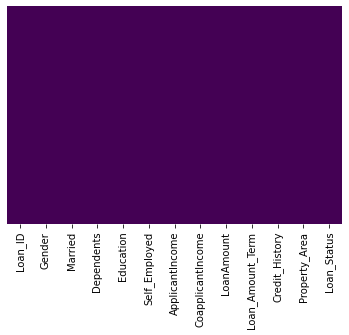

In [8]:
sns.heatmap(loan.isnull(), yticklabels = False, cbar =False, cmap ='viridis')

In [9]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### E. LABEL ENCODING 

In [10]:
loan['Dependents'].replace(to_replace = '3+', value = 4, inplace = True) 
loan.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

# CONVERT CATEGORICAL VALUES TO NUMERICAL VALUES
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':
              {'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

loan[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [11]:
loan['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

##### F. VISUALIZING THE RELATIONSHIPS BETWEEN FEATURES OF THE DATASET

<AxesSubplot:xlabel='Education', ylabel='count'>

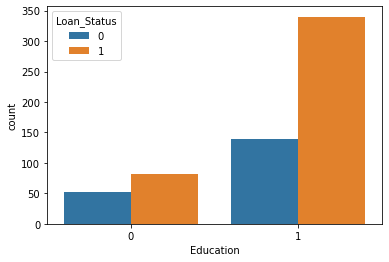

In [12]:
# EDUCATION vs. LOAN_STATUS
# N.B. 0 = NOT GRADUATE, 1 = GRADUATE
sns.countplot(x='Education',hue='Loan_Status',data=loan)

<AxesSubplot:>

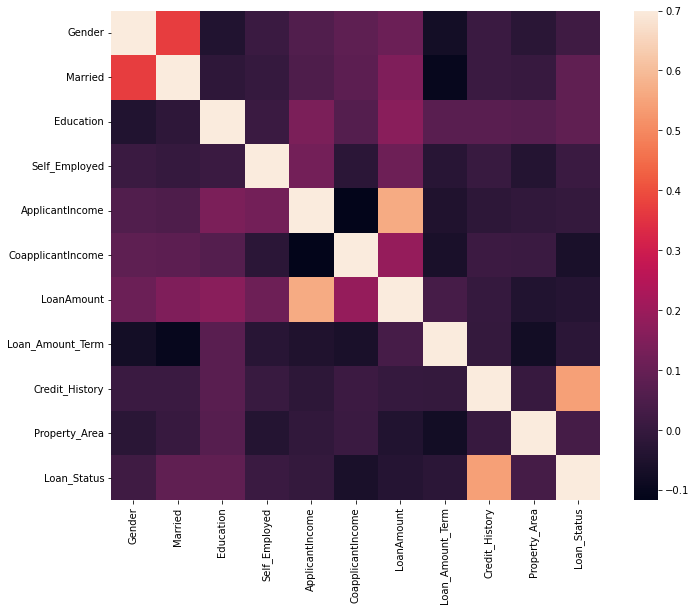

In [13]:
# CORRELATION MATRIX
corrMax = loan.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrMax, vmax = 0.7, square = True)

### 4. SPLIT THE DATASET INTO FEATURES/DEPENDENT VARIABLES AND TARGET/LABEL VARIABLES

In [14]:
X = loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)    # LOAN_ID IS OF NO USE TO OUR MODEL
Y = loan['Loan_Status']
##print(X)
print(Y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


### 5. SPLITTING THE X & Y DATA POINTS INTO TRAIN & TEST DATA

In [15]:
# X_train = Training Dataset    # X_test = Test Dataset   # Y_train = Labels for X_train    # Y_test = Labels for Y_train
# test_size = The % of X data points that you wanna put as test dataset   
# stratify = ensure near even distribution of labels in the test and the train data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(X_train)
print(X_test)          # N.B. IT WONT BE IN ORDER BECAUSE WE SPLITTED IT RANDOMLY

(614, 11) (491, 11) (123, 11)
     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
270       0        0          0          1              0             3237   
557       1        1          4          1              1            10139   
248       1        1          1          1              0             2882   
110       1        0          0          1              0             5316   
323       0        0          0          1              0             3166   
..      ...      ...        ...        ...            ...              ...   
132       1        0          0          1              0             2718   
292       1        1          2          1              0             3153   
106       1        1          2          1              0            11417   
105       1        1          1          1              0             3052   
73        1        1          4          0              0             4755   

     CoapplicantIncome  LoanAmoun

### 6. TRAIN THE MODEL
    USING THE SUPPORT VECTOR MACHINE ALGORITHM

In [16]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)    # TRAINING THE MODEL WITH THE TRAIN DATASETs I.E. X_train & Y_train

SVC(kernel='linear')

### 7. EVALUATE THE MODEL
##### DISPLAY ACCURACY OF THE MODEL ON BOTH TRAIN & TEST DATASETS

In [17]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('MODEL ACCURACY ON THE TRAINING DATA : ', training_data_accuracy)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 
print('MODEL ACCURACY ON THE TEST DATA : ', test_data_accuracy)

MODEL ACCURACY ON THE TRAINING DATA :  0.8044806517311609
MODEL ACCURACY ON THE TEST DATA :  0.8130081300813008


### 8. PUT THE (PREDICTIVE) MODEL TO TEST

In [18]:
Y_train.iloc[248]

1

In [19]:
B = X_train.loc[X_train['ApplicantIncome'] == 2882]
B

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
248,1,1,1,1,0,2882,1843.0,123.0,480.0,1.0,1


In [20]:
# GET (A SINGLE ROW WITHOUT THE COLUMN INDEX 8) THIS  FROM THE ORIGINAL DATASET (diabetes.csv)
input_data = B

prediction = classifier.predict(input_data)

if (prediction[0] == 0):
  print('NOT ELIGIBLE FOR LOAN')
else:
  print('ELIGIBLE FOR LOAN')

ELIGIBLE FOR LOAN
